# Visualize Points results

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import copy
import os

In [3]:
def cal_mean(dataset_chosen_dir,name_list,long_len = 1000):
    data_sample = pd.read_csv(dataset_chosen_dir + name_list[0])
    data_sum_all = np.zeros((len(name_list),data_sample.shape[1],long_len))
    
    
    for k,name in enumerate(name_list):
        data = pd.read_csv(dataset_chosen_dir + name)
        
        data_sum = broad_longer(np.array(data).T,long_len)
        data_sum_all[k] = data_sum

    # Calculate the mean of data
    data_sum_mean = np.mean(data_sum_all,axis = 0)
    
    return data_sum_mean,data_sample.columns

# broadcast to longer list function
def broad_longer(data_sum,long_len = 1000):
    data_extend_mean = np.zeros((data_sum.shape[0],long_len))
    data_extend_std = np.zeros((data_sum.shape[0],long_len))
    
    for i in range(data_sum.shape[0]):
        for j in range(long_len):
            index_trans = j/long_len * (data_sum.shape[1]-1)
            low_index = math.floor(index_trans)
            high_index = math.ceil(index_trans)
            #print(j,low_index,high_index)

            if low_index == index_trans or high_index == index_trans:
                data_extend_mean[i][j] = data_sum[i][int(index_trans)]
            else:
                data_extend_mean[i][j] = (data_sum[i][low_index] + data_sum[i][high_index])/2
    return data_extend_mean



In [4]:
test_path = "ORB_SLAM_TEST/"
files = os.listdir(test_path)
files = [file for file in files if file[-3:]!='csv' and "ipynb" not in file]
#files = sorted([file for file in files if 'RGBD' in file and 'gfs' in file])
#files.remove(None)
print(files)

['rgbd_dataset_freiburg1_plant', 'rgbd_dataset_freiburg1_xyz', 'rgbd_dataset_freiburg1_desk2', 'room_fast', 'rgbd_dataset_freiburg1_desk', 'room_long', 'room_roaming', 'rgbd_dataset_freiburg1_360', 'rgbd_dataset_freiburg1_room', 'rgbd_dataset_freiburg1_room_long']


In [5]:
# find the names for gfs and no gfs
# select certain dataset here
dataset_head = 'rgbd_dataset_freiburg1'


## MIH test

In [31]:
#Change the dataset name here
dataset_tail = 'xyz'

dataset_name = dataset_head + "_" + dataset_tail
#dataset_name = dataset_tail

dataset_chosen_dir = test_path + dataset_name +"/"
res_names = os.listdir(dataset_chosen_dir)

mih_names = sorted([name for name in res_names if 'csv' in name and 'mih' in name and 'points' in name])
multicount_name_dict = {'mih4':[],'mih8':[],'mih11':[],'mih-11':[],'mih16':[],'mih32':[]}

In [32]:
for name in mih_names:
    multicount_name = name.split('_')[2]
    multicount_name_dict[multicount_name] += [name]

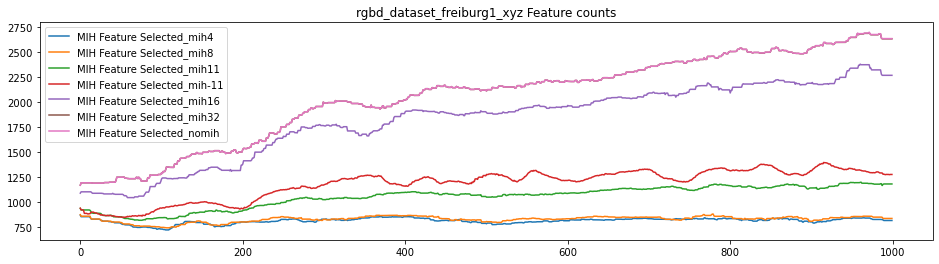

In [33]:
plt.figure(figsize = (16,4))
plt.title(dataset_name + " Feature counts")
for key in multicount_name_dict.keys():
    name_list = multicount_name_dict[key]
    if len(name_list) == 0:
        continue
        
    data_mean,name_lists = cal_mean(dataset_chosen_dir,name_list)
    
    #plt.figure(figsize = (16,4))
    #plt.title(key)
    
    #for i,data in enumerate(data_mean):
        #plt.plot(data,label = name_lists[i] + "_"  + key)
        
    plt.plot(data_mean[1],label = name_lists[1] + "_"  + key)
    
    #plt.legend()
    #plt.savefig('test_pics/' + dataset_name + " Feature Selection_" + key + ".png")
    #plt.show()
    
plt.plot(data_mean[0],label = name_lists[1] + "_nomih")
plt.legend()
#plt.ylim([0,1000])
plt.savefig('test_pics/' + dataset_name + " Feature Selection.jpg",dpi=200)
plt.show()

## MIH Blocksize test

In [71]:
#Change the dataset name here
dataset_tail = 'desk'

dataset_name = dataset_head + "_" + dataset_tail

dataset_chosen_dir = test_path + dataset_name +"/"
res_names = os.listdir(dataset_chosen_dir)

In [72]:
block_names = sorted([name for name in res_names if 'csv' in name and 'block' in name and 'points' in name])

block_name_dict = {'blocksize10':[],'blocksize30':[],'blocksize50':[]}
mih_name_dict = {'mih4':copy.deepcopy(block_name_dict),'mih8':copy.deepcopy(block_name_dict)}
color_dict = {'blocksize10':'r','blocksize30':'cyan','blocksize50':'royalblue'}

In [136]:
mih_name_dict

{'mih4': {}, 'mih8': {}}

In [73]:
for name in block_names:
    mih_name = name.split('_')[2]
    block_name = name.split('_')[3]
    mih_name_dict[mih_name][block_name] += [name]

In [74]:
def cal_mean(dataset_chosen_dir,name_list,long_len = 1000):
    data_sample = pd.read_csv(dataset_chosen_dir + name_list[0])
    data_sum_all = np.zeros((len(name_list),data_sample.shape[1],long_len))
    
    
    for k,name in enumerate(name_list):
        data = pd.read_csv(dataset_chosen_dir + name)
        
        data_sum = broad_longer(np.array(data).T,long_len)
        data_sum_all[k] = data_sum

    # Calculate the mean of data
    data_sum_mean = np.mean(data_sum_all,axis = 0)
    
    return data_sum_mean,data_sample.columns

# broadcast to longer list function
def broad_longer(data_sum,long_len = 1000):
    data_extend_mean = np.zeros((data_sum.shape[0],long_len))
    data_extend_std = np.zeros((data_sum.shape[0],long_len))
    
    for i in range(data_sum.shape[0]):
        for j in range(long_len):
            index_trans = j/long_len * (data_sum.shape[1]-1)
            low_index = math.floor(index_trans)
            high_index = math.ceil(index_trans)
            #print(j,low_index,high_index)

            if low_index == index_trans or high_index == index_trans:
                data_extend_mean[i][j] = data_sum[i][int(index_trans)]
            else:
                data_extend_mean[i][j] = (data_sum[i][low_index] + data_sum[i][high_index])/2
    return data_extend_mean


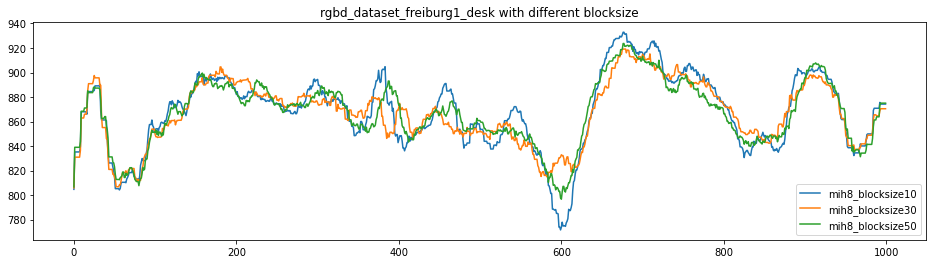

In [76]:
plt.figure(figsize = (16,4))

mih_key = 'mih8'
block_dict = mih_name_dict[mih_key]
for block_key in block_dict.keys():
    block_name_list = block_dict[block_key]
    data_mean,name_lists = cal_mean(dataset_chosen_dir,block_name_list)
    plt.plot(data_mean[1],label = mih_key + "_" + block_key)

plt.title(dataset_name + " with different blocksize")
plt.legend()
#plt.savefig('test_pics/'+dataset_name+"_time_res_MIH.jpg")
plt.show()

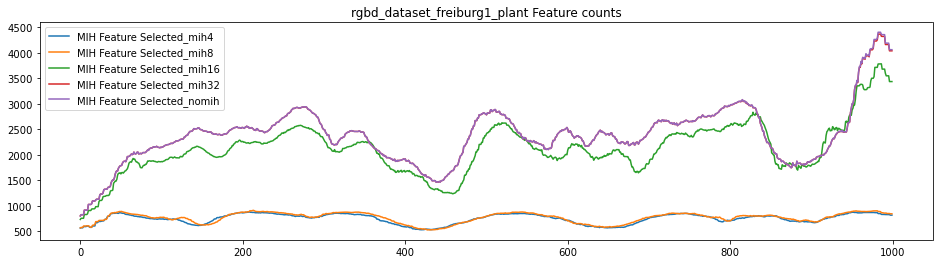

In [127]:
plt.figure(figsize = (16,4))
plt.title(dataset_name + " Feature counts")
for key in multicount_name_dict.keys():
    name_list = multicount_name_dict[key]
    
    data_mean,name_lists = cal_mean(dataset_chosen_dir,name_list)
    
    #plt.figure(figsize = (16,4))
    #plt.title(key)
    
    #for i,data in enumerate(data_mean):
        #plt.plot(data,label = name_lists[i] + "_"  + key)
        
    plt.plot(data_mean[1],label = name_lists[1] + "_"  + key)
    
    #plt.legend()
    #plt.savefig('test_pics/' + dataset_name + " Feature Selection_" + key + ".png")
    #plt.show()
    
plt.plot(data_mean[0],label = name_lists[1] + "_nomih")
plt.legend()
plt.savefig('test_pics/' + dataset_name + " Feature Selection.jpg")
plt.show()

In [67]:
mih_name_dict

{'mih4': {'blocksize10': ['RGBD_nogfs_mih4_blocksize10_0_points.csv',
   'RGBD_nogfs_mih4_blocksize10_1_points.csv',
   'RGBD_nogfs_mih4_blocksize10_2_points.csv',
   'RGBD_nogfs_mih4_blocksize10_3_points.csv'],
  'blocksize30': ['RGBD_nogfs_mih4_blocksize30_0_points.csv',
   'RGBD_nogfs_mih4_blocksize30_1_points.csv',
   'RGBD_nogfs_mih4_blocksize30_2_points.csv',
   'RGBD_nogfs_mih4_blocksize30_3_points.csv'],
  'blocksize50': ['RGBD_nogfs_mih4_blocksize50_0_points.csv',
   'RGBD_nogfs_mih4_blocksize50_1_points.csv',
   'RGBD_nogfs_mih4_blocksize50_2_points.csv',
   'RGBD_nogfs_mih4_blocksize50_3_points.csv']},
 'mih8': {'blocksize10': ['RGBD_nogfs_mih8_blocksize10_0_points.csv',
   'RGBD_nogfs_mih8_blocksize10_1_points.csv',
   'RGBD_nogfs_mih8_blocksize10_2_points.csv',
   'RGBD_nogfs_mih8_blocksize10_3_points.csv',
   'RGBD_nogfs_mih8_blocksize10_4_points.csv'],
  'blocksize30': ['RGBD_nogfs_mih8_blocksize30_0_points.csv',
   'RGBD_nogfs_mih8_blocksize30_1_points.csv',
   'RGBD_no

['RGBD_nogfs_mih4_blocksize10_0_points.csv', 'RGBD_nogfs_mih4_blocksize10_1_points.csv', 'RGBD_nogfs_mih4_blocksize10_2_points.csv']
['RGBD_nogfs_mih4_blocksize30_0_points.csv', 'RGBD_nogfs_mih4_blocksize30_1_points.csv', 'RGBD_nogfs_mih4_blocksize30_2_points.csv']
['RGBD_nogfs_mih4_blocksize50_0_points.csv', 'RGBD_nogfs_mih4_blocksize50_1_points.csv', 'RGBD_nogfs_mih4_blocksize50_2_points.csv']
['RGBD_nogfs_mih8_blocksize10_0_points.csv', 'RGBD_nogfs_mih8_blocksize10_1_points.csv', 'RGBD_nogfs_mih8_blocksize10_2_points.csv']
['RGBD_nogfs_mih8_blocksize30_0_points.csv', 'RGBD_nogfs_mih8_blocksize30_1_points.csv', 'RGBD_nogfs_mih8_blocksize30_2_points.csv']
['RGBD_nogfs_mih8_blocksize50_0_points.csv', 'RGBD_nogfs_mih8_blocksize50_1_points.csv', 'RGBD_nogfs_mih8_blocksize50_2_points.csv']


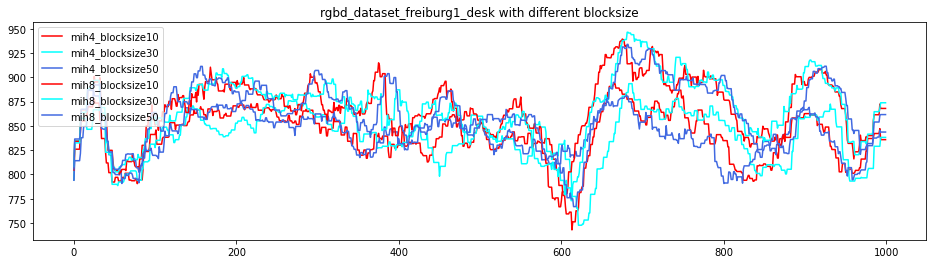

In [58]:
plt.figure(figsize = (16,4))
for mih_key in mih_name_dict.keys():
    block_dict = mih_name_dict[mih_key]
    for block_key in block_dict.keys():
        block_name_list = block_dict[block_key]
        print(block_name_list)
        data_mean,name_lists = cal_mean(dataset_chosen_dir,block_name_list)
        plt.plot(data_mean[1],label = mih_key + "_" + block_key)

plt.title(dataset_name + " with different blocksize")
plt.legend()
plt.savefig('test_pics/'+dataset_name+"_time_res_MIH.jpg")
plt.show()

In [55]:
mih_name_dict

{'mih4': {'blocksize10': ['RGBD_nogfs_mih4_blocksize10_0_points.csv',
   'RGBD_nogfs_mih4_blocksize10_1_points.csv',
   'RGBD_nogfs_mih4_blocksize10_2_points.csv'],
  'blocksize30': ['RGBD_nogfs_mih4_blocksize30_0_points.csv',
   'RGBD_nogfs_mih4_blocksize30_1_points.csv',
   'RGBD_nogfs_mih4_blocksize30_2_points.csv'],
  'blocksize50': ['RGBD_nogfs_mih4_blocksize50_0_points.csv',
   'RGBD_nogfs_mih4_blocksize50_1_points.csv',
   'RGBD_nogfs_mih4_blocksize50_2_points.csv']},
 'mih8': {'blocksize10': ['RGBD_nogfs_mih8_blocksize10_0_points.csv',
   'RGBD_nogfs_mih8_blocksize10_1_points.csv',
   'RGBD_nogfs_mih8_blocksize10_2_points.csv'],
  'blocksize30': ['RGBD_nogfs_mih8_blocksize30_0_points.csv',
   'RGBD_nogfs_mih8_blocksize30_1_points.csv',
   'RGBD_nogfs_mih8_blocksize30_2_points.csv'],
  'blocksize50': ['RGBD_nogfs_mih8_blocksize50_0_points.csv',
   'RGBD_nogfs_mih8_blocksize50_1_points.csv',
   'RGBD_nogfs_mih8_blocksize50_2_points.csv']}}

In [ ]:
mih_name_dict = mih_name_dict['mih']

In [46]:
mih_names

['RGBD_nogfs_mih4_blocksize10_0_points.csv',
 'RGBD_nogfs_mih4_blocksize10_1_points.csv',
 'RGBD_nogfs_mih4_blocksize10_2_points.csv',
 'RGBD_nogfs_mih4_blocksize30_0_points.csv',
 'RGBD_nogfs_mih4_blocksize30_1_points.csv',
 'RGBD_nogfs_mih4_blocksize50_0_points.csv',
 'RGBD_nogfs_mih4_blocksize50_1_points.csv',
 'RGBD_nogfs_mih8_blocksize10_0_points.csv',
 'RGBD_nogfs_mih8_blocksize10_1_points.csv',
 'RGBD_nogfs_mih8_blocksize10_2_points.csv',
 'RGBD_nogfs_mih8_blocksize30_0_points.csv',
 'RGBD_nogfs_mih8_blocksize30_1_points.csv',
 'RGBD_nogfs_mih8_blocksize30_2_points.csv',
 'RGBD_nogfs_mih8_blocksize50_0_points.csv',
 'RGBD_nogfs_mih8_blocksize50_1_points.csv',
 'RGBD_nogfs_mih8_blocksize50_2_points.csv']

In [45]:
mih_names = sorted([name for name in res_names if 'csv' in name and 'block' in name and 'points' in name])
multicount_name_dict = {'mih4':[],'mih8':[],'mih16':[],'mih32':[]}

In [125]:
for name in mih_names:
    multicount_name = name.split('_')[2]
    multicount_name_dict[multicount_name] += [name]

{'mih4': {'blocksize10': [], 'blocksize30': [], 'blocksize50': []},
 'mih8': {'blocksize10': [], 'blocksize30': [], 'blocksize50': []}}

In [8]:
res_names

['error_res_nogfs_mih32_15',
 'KeyFrameTrajectory_RGBD_nogfs_mih16_3.txt',
 'CameraTrajectory_RGBD_nogfs_mih4_17.txt',
 'RGBD_nogfs_mih4_blocksize50_2_time.csv',
 'RGBD_nogfs_mih16_10_mihpoints.csv',
 'KeyFrameTrajectory_RGBD_nogfs_mih8_blocksize10_1.txt',
 'RGBD_nogfs_8_time.csv',
 'RGBD_nogfs_mih32_14_time.csv',
 'RGBD_nogfs_mih4_blocksize50_0_time.csv',
 'error_res_gfs_6',
 'KeyFrameTrajectory_RGBD_nogfs_mih32_14.txt',
 'CameraTrajectory_RGBD_nogfs_mih32_1.txt',
 'CameraTrajectory_RGBD_nogfs_mih32_15.txt',
 'CameraTrajectory_RGBD_nogfs_nomih_0.txt',
 'CameraTrajectory_RGBD_nogfs_mih4_3.txt',
 'KeyFrameTrajectory_RGBD_nogfs_mih32_7.txt',
 'KeyFrameTrajectory_RGBD_nogfs_mih8_blocksize50_4.txt',
 'KeyFrameTrajectory_badgfs_4.txt',
 'KeyFrameTrajectory_badgfs_0.txt',
 'RGBD_gfs_4_time.csv',
 'KeyFrameTrajectory_RGBD_nogfs_nomih_10.txt',
 'error_res_nogfs_mih16_5',
 'error_res_nogfs_mih16_3',
 'CameraTrajectory_nogfs_2.txt',
 'RGBD_nogfs_mih8_14_mihpoints.csv',
 'RGBD_nogfs_mih4_blocksiz